<a href="https://colab.research.google.com/github/OlgaAcosta/Project1_DataScience_Henry/blob/main/EDA_y_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importo las librerías a utilizar:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Obtengo los datos en un dataframe:

In [ ]:
df_movies = pd.read_csv("/content/drive/MyDrive/PI_ML_OPS/movies.csv", sep=",")
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45345 non-null  int64  
 1   title                 45345 non-null  object 
 2   original_language     45334 non-null  object 
 3   genres                45345 non-null  object 
 4   overview              44404 non-null  object 
 5   tagline               20387 non-null  object 
 6   runtime               45099 non-null  float64
 7   spoken_languages      45345 non-null  object 
 8   status                45265 non-null  object 
 9   director              45345 non-null  object 
 10  actors                45345 non-null  object 
 11  production_companies  45345 non-null  object 
 12  production_countries  45345 non-null  object 
 13  release_date          45345 non-null  object 
 14  release_year          45345 non-null  int64  
 15  vote_average       

#**I. EDA**

# Matriz de correlación

Genero la **matriz de correlación** para las variables numéricas:

In [ ]:
corr= df_movies.corr()

<ipython-input-27-a8265eea62a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df_movies.corr()


Grafico la matriz:

In [ ]:
corr.style.background_gradient()

,id,runtime,release_year,vote_average,vote_count,popularity,budget,revenue,return
id,1.000000,-0.119359,0.286999,-0.165114,-0.064514,-0.082459,-0.101274,-0.070987,-0.006759
runtime,-0.119359,1.000000,0.078778,0.156642,0.113527,0.129632,0.134706,0.103969,0.000891
release_year,0.286999,0.078778,1.000000,0.025899,0.106803,0.131646,0.131654,0.088364,-0.005020
vote_average,-0.165114,0.156642,0.025899,1.000000,0.123602,0.153717,0.073159,0.083811,0.005591
vote_count,-0.064514,0.113527,0.106803,0.123602,1.000000,0.559955,0.676668,0.812019,0.003597
popularity,-0.082459,0.129632,0.131646,0.153717,0.559955,1.000000,0.449603,0.506200,0.003215
budget,-0.101274,0.134706,0.131654,0.073159,0.676668,0.449603,1.000000,0.768811,-0.002137
revenue,-0.070987,0.103969,0.088364,0.083811,0.812019,0.506200,0.768811,1.000000,0.000791
return,-0.006759,0.000891,-0.005020,0.005591,0.003597,0.003215,-0.002137,0.000791,1.000000


**Análisis de la matriz de correlación:**

La matriz refleja la alta correlación entre *revenue* y *vote_count*, así como entre *revenue* y *budget*. También hay una relación relativamente alta entre *vote_count* y *budget*. Esto parece indicar que la variable *revenue* resume bien a *vote_count* y *budget*.

Además, la columna return muestra una casi nula correlación con las demás variables.

# Pairplot

Obtengo un **pairplot** para visualizar mejor el comportamiento entre las variables numéricas, sin contar la columna "id" ya que ésta es irrelevante:

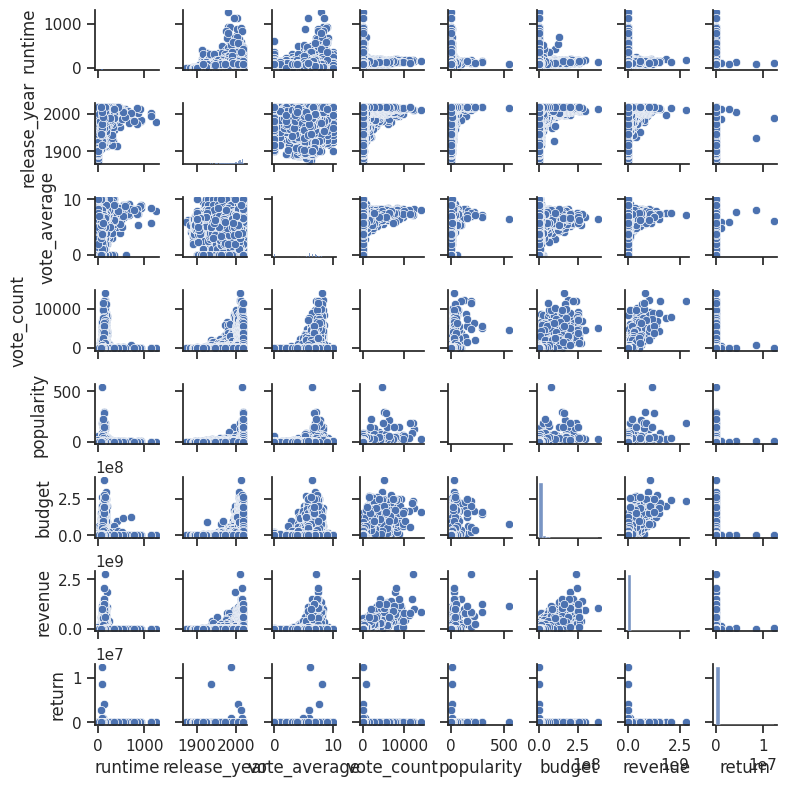

In [ ]:
sns.pairplot(data=df_movies.drop("id", axis=1), height=1)
sns.set(style="ticks")


Reviso el outlier de la columna "runtime":

In [ ]:
df_movies["runtime"].max()

1256.0

Visualizo el registro:

In [ ]:
df_movies[df_movies["runtime"]==1256]


,id,title,original_language,genres,overview,tagline,runtime,spoken_languages,status,director,...,production_countries,release_date,release_year,vote_average,vote_count,popularity,franquicia,budget,revenue,return
24133,67493,Centennial,en,"['Drama', 'History']",The economic and cultural growth of Colorado s...,NaN,1256.0,[],Released,"['Virgil W. Vogel', 'Harry Falk', 'Paul Krasny...",...,['United States of America'],1978-10-01,1978,7.9,8.0,0.664727,NaN,0.0,0.0,0.0


**Análisis del pairplot**

*  La cantidad de votos (vote_count) es mayor en películas con un voto promedio (vote_average) más alto, así como en pelíulas de años más recientes.

*  Las películas estrenadas recientemente (release_year) tienen mayor cantidad en budget, popularity, revenue, vote_Average, vote_count. Esto indica que puede hacerse un análisis más preciso de la cantidad de películas realizadas en relación al año para determinar en qué periodo se concentra la mayor cantidad de películas, revisar nuevamente su correlación con las otras variables y, de ser el caso, descartar periodos cuya cantidad sea irrelevante para el modelo de recomendación.

*  Se confirma la alta relación entre revenue , vote_count, budget.

*  La columna *runtime* tiene valores extremos (películas de más de 500 minutos), los cuales podrían descartarse pero no parece ser una variable relevante para un modelo de recomendación, ya que su coportamiento respecto a las demás variables sigue el siguiente patrón: se concentra en un duración menor a 200 min en ese intervalo tiene valores a lo largo del rango de cada una de las otras variables, lo cual indica una relatividad y casi nula relación (como lo reflejan sus coeficientes en la matriz de correlación).







# Histograma

*A partir del análisis anterior (pairplot), genero el histograma de la columna "release_year":*

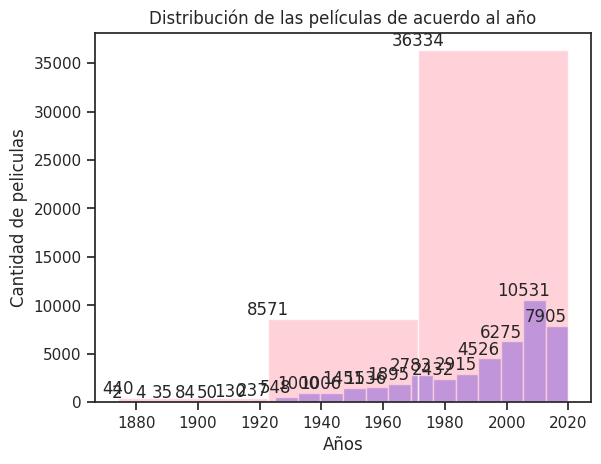

In [ ]:
# 1. Genero un histograma de 14 bins para ver más a detalle:
frecuencias, bins, _ = plt.hist(df_movies["release_year"], bins=20, density=False, alpha=0.8, color= "blue")
plt.xlabel('Años')
plt.ylabel('Cantidad de peliculas')
plt.title('Distribución de las películas de acuerdo al año')

# Itero el histograma para que muestre la frecuencia (cantidad de películas) en cada barra
for frecuencia, bin in zip(frecuencias, bins):
    plt.text(bin, frecuencia, str(int(frecuencia)), ha='center', va='bottom')

# 2.Genero un histograma de 3 bins para una visión general:
frecuencias, bins, _ = plt.hist(df_movies["release_year"], bins=3, density=False, alpha=0.7, color="pink")


# Itero el histograma para que muestre la frecuencia (cantidad de películas) en cada barra
for frecuencia, bin in zip(frecuencias, bins):
    plt.text(bin, frecuencia, str(int(frecuencia)), ha='center', va='bottom')


**Análisis del histograma:**

*  El histograma muestra que la cantidad de películas en años más antiguos es menor, y que ésta comienza a tener más presencia a partir de los años 1960-1970.

Calculo el porcentaje de películas a partir del año 1965 respecto al total:

In [ ]:

df_movies[df_movies["release_year"]>=1955].shape[0] / df_movies.shape[0]

0.8997243356489139

**Conclusión:**

*  De acuerdo a lo anterior, las películas a partir del año 1955 representan casi el 90% del total, lo que implica que la mayor cantidad de datos se encuentran a partir de este año y, por lo tanto, se podría prescindir del resto para el modelo de recomendación con el fin de hacerlo más eficiente.

Filtro el dataframe con las películas a partir del año 1955:

In [ ]:
movies=df_movies[df_movies["release_year"]>=1955]
movies.shape

(40798, 22)

Genero el **pairplot** del nuevo dataframe:

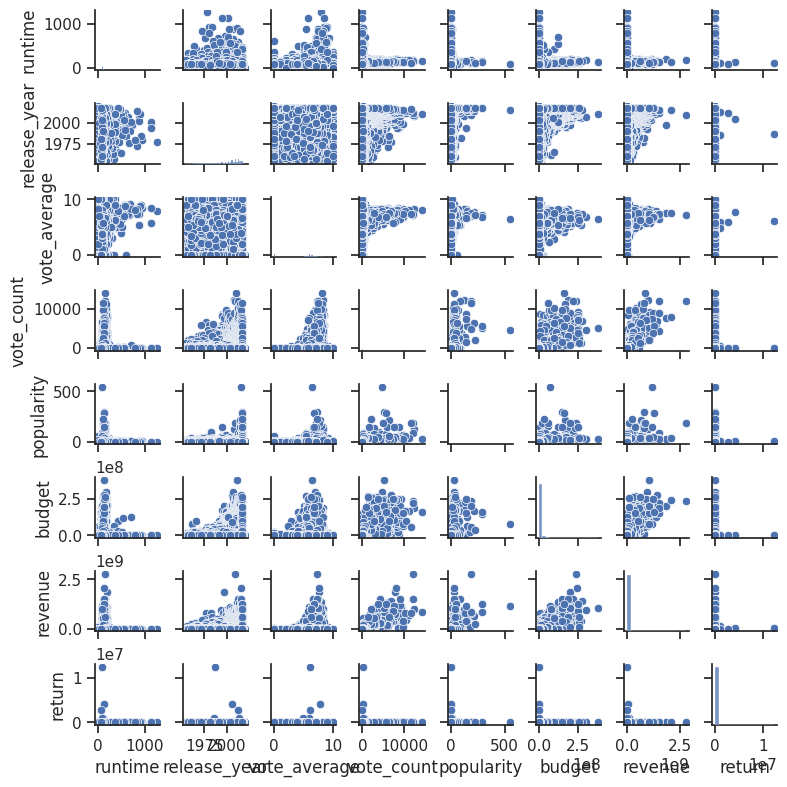

In [ ]:
sns.pairplot(data=movies.drop("id", axis=1), height=1)
sns.set(style="ticks")

Se puede ver que la dispersión de *release_year* respecto a las demás variables, se encuentra más distribuida.

# Word Cloud

Instalo la librería

In [ ]:
pip install wordcloud


Importo la clase necesaria:

In [ ]:
from wordcloud import WordCloud

Genero un **wordcloud** para la columna *overview*:

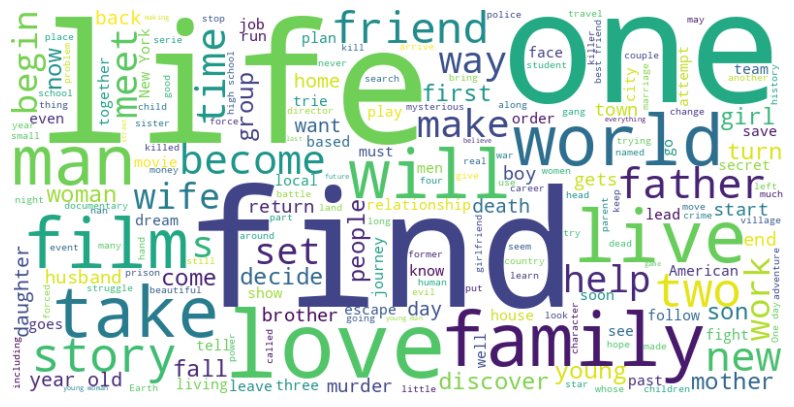

In [ ]:
# Concateno todos los registros de "overview" en un solo string
text = ' '.join(movies['overview'].astype(str))

# Creo un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Grafico el Wordcloud usando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Genero un **wordcloud** para la columna *title*:

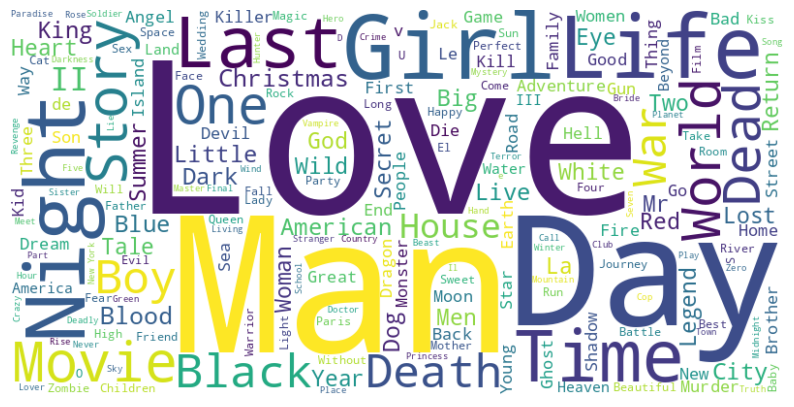

In [ ]:
# Concateno todos los registros de "title" en un solo string
text = ' '.join(movies["title"].astype(str))

# Creo un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Grafico el Wordcloud usando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Análisis de los wordclouds:**


*  Algunas de las palabras más frecuentes en el título de las películas coinciden con las del *overview*.

*  Para hacer un ** wordcloud** más robusto, podría concatenarse  *title* y *overview*
de cada película, generar un wordcloud a partir de cada concatenación y comparar la coincidencia entre sí. Así, el modelo de recomendación puede usar como criterio las palabras más frecuentes en *title* y *overview*, y considerar también los géneros de la columna *genres*.

# Defino las columnas necesarias para la recomendación

Antes de definir las columnas, reviso los valores de *status* para determinar si alguno implica que la película no esté disponible:

In [ ]:
movies["status"].value_counts()

Released           40382
Rumored              207
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

Al parecer, solo hay una película cancelada que no estaría disponible, por lo que no sería bueno recomendarla. Localizo el registro:

In [ ]:
movies[movies["status"]== "Canceled"]

,id,title,original_language,genres,overview,tagline,runtime,spoken_languages,status,director,...,production_countries,release_date,release_year,vote_average,vote_count,popularity,franquicia,budget,revenue,return
40331,64109,Paanch,en,[],"The film is ""loosely"" based on the 1976-77 Jos...",NaN,130.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Canceled,['Anurag Kashyap'],...,[],2003-01-01,2003,6.3,3.0,0.189724,NaN,0.0,0.0,0.0


Elimino el registro:

In [ ]:
movies= movies.drop(index= 40331)


De acuerdo a todo lo observado, defino las columnas a utilizar en mi modelo de recomendación:


*  Columnas para la recomendación: genres, overview, title
*   La columna *id* la preservo para localizar sin problemas las películas.
*   La columna *vote_average* la preservo para dar información sobre el voto de las películas recomendadas en la función final.
*   La columna *release_year* la preservo para diferenciar películas con el mismo nombre.





In [ ]:
movies = movies[["id","title", "release_year","overview", "genres", "vote_average"]]

# Reviso:
movies.head()

,id,title,release_year,overview,genres,vote_average
0,862,Toy Story,1995,"Led by Woody, Andy's toys live happily in his ...","['Animation', 'Comedy', 'Family']",7.7
1,8844,Jumanji,1995,When siblings Judy and Peter discover an encha...,"['Adventure', 'Fantasy', 'Family']",6.9
2,15602,Grumpier Old Men,1995,A family wedding reignites the ancient feud be...,"['Romance', 'Comedy']",6.5
3,31357,Waiting to Exhale,1995,"Cheated on, mistreated and stepped on, the wom...","['Comedy', 'Drama', 'Romance']",6.1
4,11862,Father of the Bride Part II,1995,Just when George Banks has recovered from his ...,['Comedy'],5.7


Finalmente, exporto el dataframe final:

In [ ]:
# Creo la ruta:
savefile_path = '/content/drive/MyDrive/PI_ML_OPS/ml_movies.csv'

# Exporto el dataframe:
movies.to_csv(savefile_path, index=False)

# **II. Machine Learning**

Importo las librerías a utilizar:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast

In [ ]:
def recomendacion(titulo: str):

  # Verifico si el titulo es un string:
  if type(titulo)!= str:
    return {"Error": f"'{titulo}' no es un string"}

  # Si es un string, continúa el código. Normalizo el título:
  titulo = titulo.strip().title()


  # Verifico si el título se encuentra en el dataframe:
  if movies[movies['title'].str.title() == titulo].shape[0] == 0:
    return {"Error": f"No se encontró la película {titulo}"}

  # Si se encuentra en el dataframe, creo un nuevo df con todas las películas con el mismo título:
  movies_same_title = movies[movies['title'].str.title() == titulo]

  # Creo el diccionario de recomendaciones finales:
  recommendations_dict = {}

  # Itero en el nuevo df para obtener los datos correspondientes:
  for _, movie in movies_same_title.iterrows():
          movie_title = movie['title'] # Obtengo cada título
          movie_anio = movie['release_year'] # Obtengo el año
          movie_id = movie['id'] # Obtengo el id de cada película
          movie_genre = ast.literal_eval(movie["genres"]) # Obtengo los géneros convirtiéndolos a lista

          # Verifico que tenga al menos un género registrado:
          if len(movie_genre) == 0:
              return {"Error": f"No se encontraron recomendaciones para la película {titulo}"}

          # Si tiene al menos un género, continúa el código:
          else:
              # Un solo género: filtro el df con películas de solo un género y que sea el mismo:
              if len(movie_genre) == 1:
                  filtered_movies = movies[movies['genres'].apply(lambda x: len(ast.literal_eval(x)) == 1 and ast.literal_eval(x) == movie_genre)]

              # Dos géneros: filtro el df con películas de solo dos géneros, que sean los mismos y en el mismo orden:
              elif len(movie_genre) == 2:
                  filtered_movies = movies[movies['genres'].apply(lambda x: len(ast.literal_eval(x)) == 2 and ast.literal_eval(x)== movie_genre)]

              # Tres géneros: filtro el df con películas de solo tres géneros, que sean los mismos y en el mismo orden:
              elif len(movie_genre) == 3:
                  filtered_movies = movies[movies['genres'].apply(lambda x: len(ast.literal_eval(x)) >= 3 and ast.literal_eval(x)[:3] == movie_genre[:3])]

              # Más de tres géneros: filtro el df con películas de al menos tres géneros, que coincidan en el orden de los tres primeros:
              else:
                  filtered_movies = movies[movies['genres'].apply(lambda x: len(ast.literal_eval(x)) >= 3 and ast.literal_eval(x)[:3] == movie_genre[:3])]


              # Reseteo el índice del dataframe filtrado para no tener problemas en encontrar los índices de las coincidencias:
              filtered_movies = filtered_movies.reset_index(drop=True)

              # Creo un vectorizador TF-IDF para las características de las películas (title y overview):
              tfidf = TfidfVectorizer(stop_words='english')

              # Combino las características (title y overview) en un solo campo:
              filtered_movies['combined_features'] = filtered_movies['title'] + ' ' + filtered_movies['overview'].fillna('') # Imputo nulos en "overview"

              # Calculo la matriz TF-IDF de las características:
              tfidf_matrix = tfidf.fit_transform(filtered_movies['combined_features'])

              # Busco el índice correspondiente al ID de la película ingresada:
              movie_index = filtered_movies[filtered_movies['id'] == movie_id].index[0]

              # Calculo la similitud de coseno entre la película de entrada y las películas filtradas:
              similarities = cosine_similarity(tfidf_matrix[movie_index], tfidf_matrix).flatten()

              # Obtengo los índices de las 5 películas más parecidas (excluyendo la película ingresada):
              top_indices = similarities.argsort()[-6:-1][::-1]

              # Creo el diccionario de recomendaciones para el título correspondiente a la iteración actual:
              recommendations = {}
              for idx in top_indices:
                  rec_movie_title = filtered_movies.iloc[idx]['title']
                  rec_movie_genres = filtered_movies.iloc[idx]['genres']
                  rec_movie_vote_average = filtered_movies.iloc[idx]['vote_average']
                  recommendations[rec_movie_title] = {'generos': rec_movie_genres, 'puntaje': rec_movie_vote_average}

              # Lleno el diccionario final con las recomendaciones de la iteración actual:
              recommendations_dict[f"{movie_title}, año {movie_anio}"] = recommendations

  # Devuelvo el diccionario final que contiene recomendaciones para cada película que coincida con el título ingresado:
  return recommendations_dict



In [ ]:
recomendacion("Hotel Transylvania")

{'Hotel Transylvania, año 2012': {'Hotel Transylvania 2': {'generos': "['Animation', 'Comedy', 'Family']",
   'puntaje': 6.7},
  'SeaFood': {'generos': "['Animation', 'Comedy', 'Family', 'Adventure']",
   'puntaje': 4.9},
  'Meet the Deedles': {'generos': "['Animation', 'Comedy', 'Family']",
   'puntaje': 4.1},
  'Scooby-Doo Goes Hollywood': {'generos': "['Animation', 'Comedy', 'Family']",
   'puntaje': 6.0},
  'Oliver & Company': {'generos': "['Animation', 'Comedy', 'Family']",
   'puntaje': 6.5}}}